In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['train.csv']))

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
pd.DataFrame(df.groupby('Pclass')['Survived'].mean())

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [ ]:
pd.DataFrame(df.groupby('Sex')['Survived'].mean())

,Survived
Sex,
female,0.742038
male,0.188908


In [ ]:
pd.DataFrame(df.groupby('SibSp')['Survived'].mean())

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [ ]:
pd.DataFrame(df.groupby('Parch')['Survived'].mean())

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


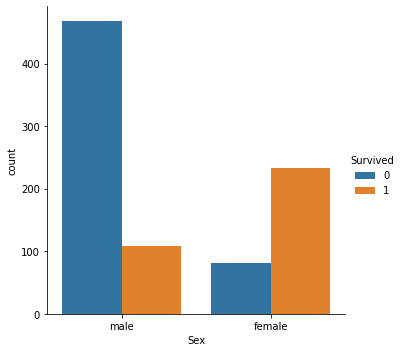

In [ ]:
sns.catplot(x= 'Sex', hue='Survived', kind='count', data= df)

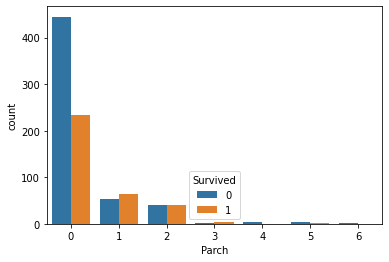

In [ ]:
sns.countplot(x= 'Parch', hue= 'Survived', data= df)

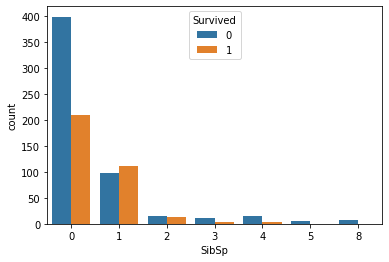

In [ ]:
sns.countplot(x= 'SibSp', hue= 'Survived', data= df)

In [ ]:
group = df.groupby(['Pclass', 'Survived'])

pclass_survived = group.size().unstack()
pclass_survived

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


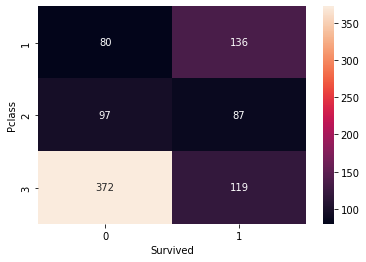

In [ ]:
sns.heatmap(pclass_survived, annot= True, fmt= 'd')

In [ ]:
group = df.groupby(['Sex', 'Survived'])

sex_survived = group.size().unstack()
sex_survived

Survived,0,1
Sex,,
female,81,233
male,468,109


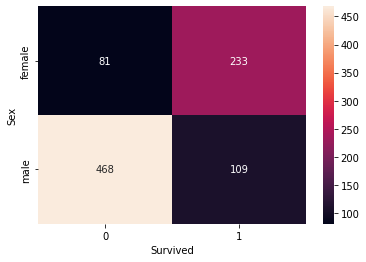

In [ ]:
sns.heatmap(sex_survived, annot= True, fmt= 'd')

In [ ]:
group = df.groupby(['SibSp', 'Survived'])

sibsp_survived = group.size().unstack()
sibsp_survived

Survived,0,1
SibSp,,
0,398.0,210.0
1,97.0,112.0
2,15.0,13.0
3,12.0,4.0
4,15.0,3.0
5,5.0,NaN
8,7.0,NaN


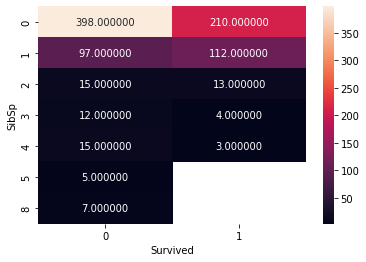

In [ ]:
sns.heatmap(sibsp_survived, annot= True, fmt= 'f')

In [ ]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [ ]:
df.shape

(891, 12)

Sex: 
 [314 577]
Survived: 
 [549 342]


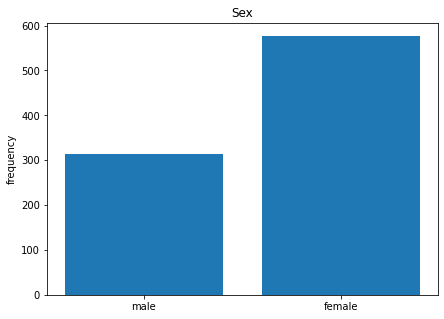

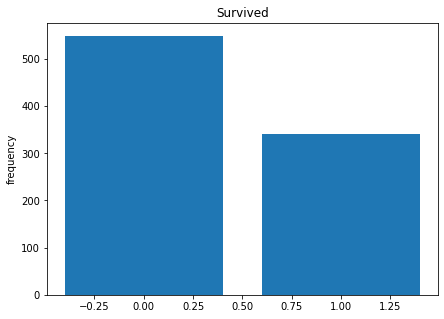

In [ ]:
# bar plot for categorical columns
def bar_plot(column_name):

  feature_data = df[column_name]
  feature_count = df.groupby(column_name).size().values

  plt.figure(figsize = (7, 5))
  plt.bar(feature_data.unique(), feature_count)

  plt.ylabel('frequency')
  plt.title(column_name)
  #plt.xticks(feature_count.index)
  print(f"{column_name}: \n {feature_count}")

category = ['Sex', 'Survived']
for i in category:
  bar_plot(i)

plt.show()




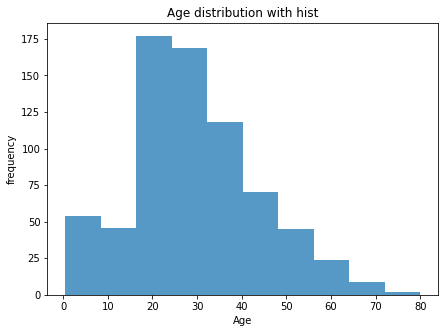

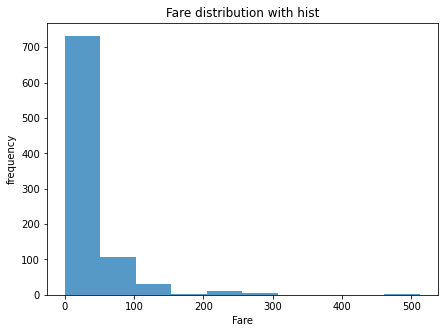

In [ ]:
# distribution plot for all numerical columns
def hist_plot(column_name):

  values = df[column_name]

  plt.figure(figsize= (7, 5))
  plt.hist(values, alpha= 0.75)

  plt.xlabel(column_name)
  plt.ylabel('frequency')
  plt.title(f"{column_name} distribution with hist")

numerical = ['Age', 'Fare']
for i in numerical:
  hist_plot(i)

plt.show()


In [ ]:
def detect_outliers(dataFrame,features):
  for feature in features:
    df_feature = dataFrame[feature]
    Q1 = df_feature.quantile(0.25)
    Q3 = df_feature.quantile(0.75)
    IQR = Q3 -Q1
    up_outlier = Q3 + 1.5 * IQR
    down_outlier = Q1 - 1.5 * IQR
    down = np.where(df_feature <= down_outlier)
    up = np.where(df_feature >= up_outlier)

    # df_feature.drop(down[0], inplace=True)
    # df_feature.drop(up[0], inplace=True)
# detect_outliers(df,["Age"])
# df.loc[detect_outliers(df,["Age","SibSp","Parch","Fare"])]

In [ ]:
df.groupby('Embarked')['Embarked'].count()

Embarked
C    168
Q     77
S    644
Name: Embarked, dtype: int64

In [ ]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
df['Embarked'].fillna('S', inplace= True)

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [ ]:
df.drop('Cabin', axis=1, inplace= True)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
df[df['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,Q
...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,S


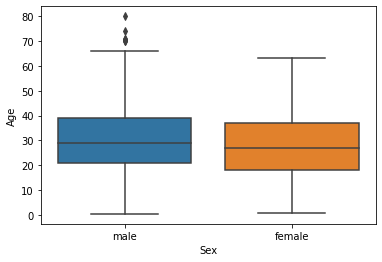

In [ ]:
sns.boxplot(x='Sex', y='Age', data= df)

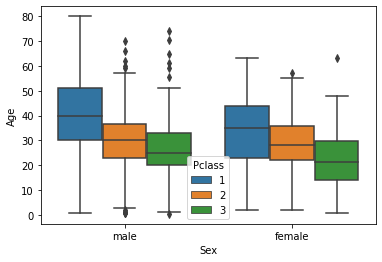

In [ ]:
sns.boxplot(x='Sex', y='Age', hue='Pclass', data= df)

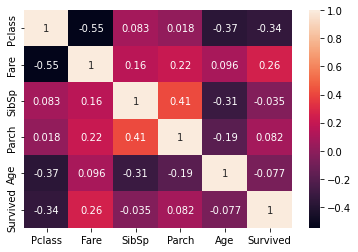

In [ ]:
sns.heatmap(df[["Sex","Pclass","Fare", "SibSp", "Parch", "Age", "Survived"]].corr(), annot= True)

In [ ]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [ ]:
df['Sex']= df['Sex'].astype('category').cat.codes
#titanic_df['Sex']  = titanic_df['Sex'].replace({'female': 1, 'male': 0})
df['Embarked'] = df['Embarked'].astype('category').cat.codes
#embarked_dic = {'C': 0, 'Q': 1, 'S': 2}
#titanic_df['Embarked'] = titanic_df['Embarked'].map(embarked_dic)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


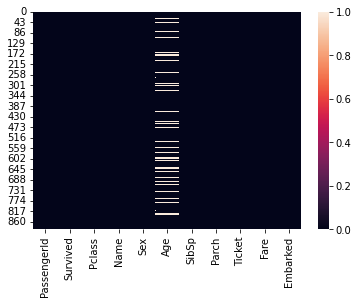

In [ ]:
sns.heatmap(df.isnull())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f836eb00610>,
      dtype=object)

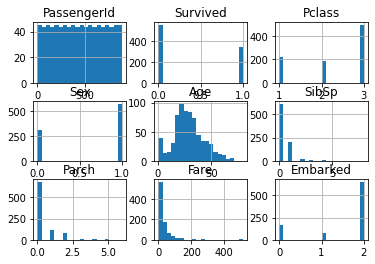

In [ ]:
df.hist(bins=20)

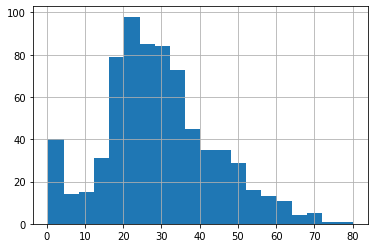

In [ ]:
df['Age'].hist(bins=20)

In [ ]:
df.drop(['Name', 'PassengerId', 'Ticket'], inplace=True, axis=1)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


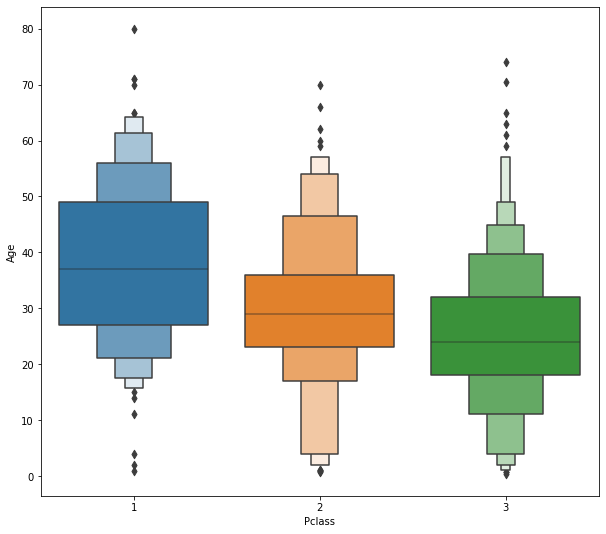

In [ ]:
plt.figure(figsize=(10,9))
sns.boxenplot(x='Pclass' , y='Age', data=df)

In [ ]:
df.groupby('Pclass')['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [ ]:
def clean_age(column):
  age = column[0]
  pclass = column[1]

  if pd.isnull(age):
    if pclass == 1:
      return 38
    elif pclass == 2:
      return 29
    else:
      return 25
  else:
    return age

df['Age'] = df[['Age', 'Pclass']].apply(clean_age, axis=1)

In [ ]:
df['Age'].isnull().sum()

0

In [ ]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
df.dropna(inplace=True)